# Imports

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [2]:
#gene_info = pd.read_csv("gene_info_some_genes.txt", sep='\t',header=0)
gene_info = pd.read_csv("gene_info_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.txt", sep='\t',header=0)
len(gene_info["Gene name"])

632

In [3]:
nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    print(gene_index, end="\r")
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1:
                if len(glob.glob(gene_folder[0]+sub_gene+".csv.gz.info"))==0 :
                    my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                    max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                    nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
                    with open(sub_gene_file[0]+".info","w+") as f:
                        f.write(str(max_corr.values[gene_index,sub_gene_index])+"\n"+str(nbr_signif_corr.values[gene_index,sub_gene_index]))
                else:
                    with open(sub_gene_file[0]+".info","r") as f:
                        max_corr.values[gene_index,sub_gene_index] = float(f.readline().strip())
                        nbr_signif_corr.values[gene_index,sub_gene_index] = (f.readline().strip())
            sub_gene_index+=1
    gene_index+=1

max_corr.shape
print("Done!")

"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

Done!


'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

# Fetch data BIOGRID

In [4]:
biogrid_df = pd.read_csv("../data/BIOGRID-MV-Physical-3.5.171.tab2.txt", sep= "\t")[["Official Symbol Interactor A","Official Symbol Interactor B"]]
nbr_genes=len(gene_info["Gene name"])
interaction_matrix_biogrid=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
for index, row in biogrid_df.iterrows():
    #row=row.str.upper()
    #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])
    if gene_info["Gene name"].isin([row["Official Symbol Interactor A"]]).any() and gene_info["Gene name"].isin([row["Official Symbol Interactor B"]]).any():
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor A"],row["Official Symbol Interactor B"]]=1
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor B"],row["Official Symbol Interactor A"]]=1
        #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,14,15,16,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Show data

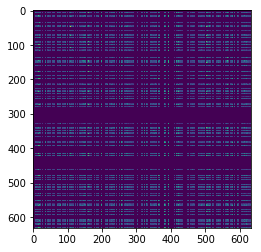

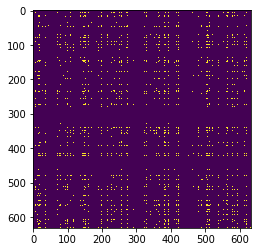

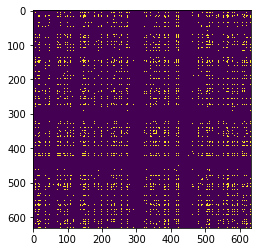

In [5]:
plt.imshow(max_corr.values)
plt.show()
plt.imshow(max_corr.values>0.3)
plt.show()
plt.imshow((max_corr.values>0.3) | np.transpose(max_corr.values>0.3))
plt.show()

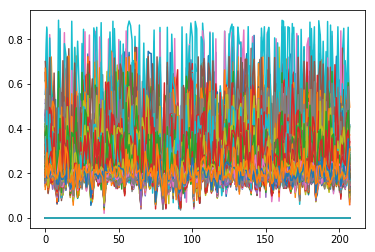

In [6]:
plt.plot(np.delete(max_corr.values,np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0))
plt.show()

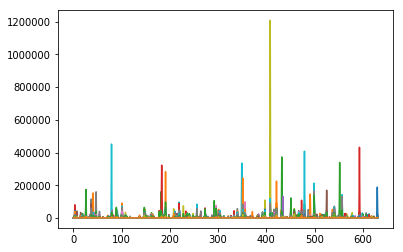

In [7]:
plt.plot(nbr_signif_corr.values)
plt.show()

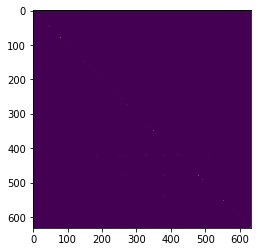

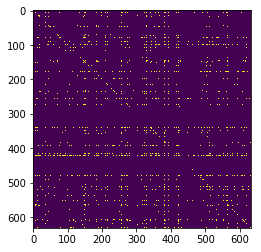

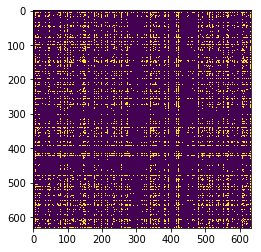

In [8]:
plt.imshow(nbr_signif_corr.values)
plt.show()
plt.imshow(nbr_signif_corr.values>3000)
plt.show()
plt.imshow((nbr_signif_corr.values>1000) | np.transpose(nbr_signif_corr.values>1000))
plt.show()

## Import and define functions

In [9]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

## Define graph for max_corr

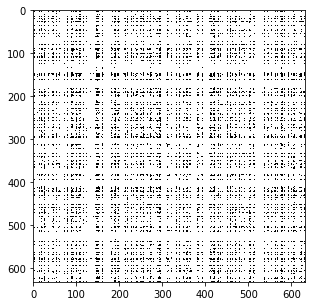

In [10]:
cutoff=0.25
G = nx.from_numpy_matrix((max_corr.values>cutoff) | np.transpose(max_corr.values>cutoff))

draw_adjacency_matrix(G)

## Define graph for nbr_signif_corr

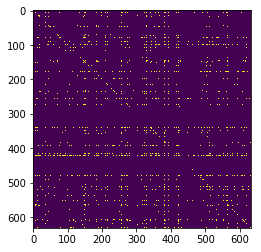

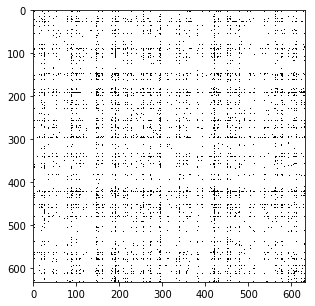

In [11]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on whole data

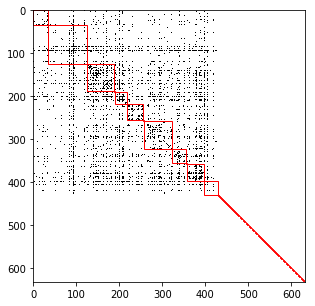

In [12]:
import numpy as np
from collections import defaultdict

import community #https://github.com/taynaud/python-louvain

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_big=[]
for commun in louvain_comms:
    louvain_comms_big.append(list(nbr_signif_corr.columns[commun]))

In [13]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    print(nbr_signif_corr.columns[commun])

Index(['HDX', 'PTEN', 'BACH1', 'MYBL1', 'NKX2-5', 'TFAP4', 'LHX4', 'FOXO4',
       'HOXB2', 'HINFP', 'CREB3L1', 'FOXD2', 'HOXB3', 'DLX1', 'DLX2', 'SHOX2',
       'TEF', 'IRF3', 'CEBPG', 'NFE2L2', 'MNX1', 'STAT5A', 'SOX7', 'FOXA2',
       'MYB', 'HEY1', 'RFX7', 'TCF3', 'RFX2', 'PKNOX1', 'SOX18', 'PTEN',
       'SOX7', 'BIN1'],
      dtype='object', name='Gene name')
Index(['LHX8'], dtype='object', name='Gene name')
Index(['EBF1', 'ZBTB7B', 'DBP', 'HMX3', 'HLF', 'MAFF', 'SP100', 'ATF6',
       'MEF2D', 'ZNF524', 'MGA', 'YY1', 'FOXC1', 'NEUROD2', 'TFEB', 'NFKB1',
       'ELK3', 'SRF', 'TEAD3', 'RXRB', 'KLF16', 'RXRB', 'BHLHE22', 'TGIF2',
       'E2F3', 'TFE3', 'ARNT', 'SOX30', 'E2F7', 'ETV5', 'SIX3', 'CUX1',
       'BRCA1', 'RARB', 'HES5', 'RXRB', 'GMEB2', 'ZNF281', 'LMO2', 'HOXC4',
       'ZNF282', 'ERF', 'ATF1', 'EMX1', 'FOXP3', 'RUNX3', 'RARG', 'ZBED1',
       'SPDEF', 'TBX21', 'ZNF691', 'RELA', 'FOXJ3', 'VSX2', 'MEF2B', 'ARNTL',
       'ATF2', 'SOX8', 'OLIG1', 'AIRE', 'DDIT3', 'MLX', 

## Delete not important data info

In [14]:
genes_to_drop=(max_corr.columns[np.sum(max_corr.values!=0, axis=1)==0])
max_corr=max_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
nbr_signif_corr=nbr_signif_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#np.delete(np.delete(max_corr.values, np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0), np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0)
#nbr_signif_corr.values

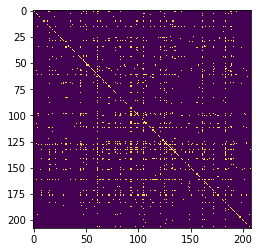

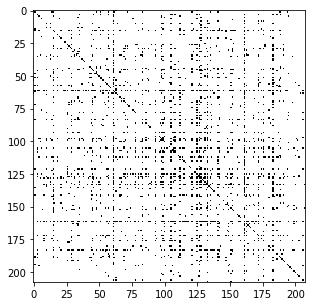

In [15]:
cutoff=11000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on part of data

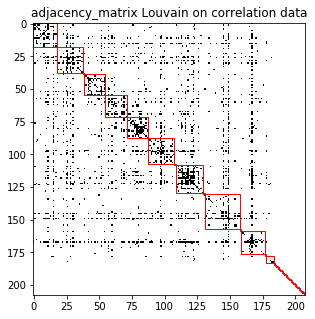

In [16]:
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on correlation data")
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

In [17]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    if len(commun) != 1 :
        print(nbr_signif_corr.columns[commun])

Index(['EBF1', 'PRRX1', 'ISX', 'SOX4', 'ESRRB', 'LHX2', 'PROX1', 'HBP1', 'OTP',
       'FOXG1', 'FOXJ1', 'DMRT1', 'ONECUT2', 'HSF4', 'HES7', 'NR2F2', 'HBP1',
       'BIN1'],
      dtype='object', name='Gene name')
Index(['TBX19', 'ELF4', 'MAFF', 'HNF1A', 'ETV3', 'MIXL1', 'TFCP2', 'RREB1',
       'HEY2', 'CLOCK', 'SPIC', 'FOXO6', 'TEF', 'OLIG1', 'MAFG', 'STAT3',
       'WT1', 'KLF4', 'ETV7', 'FOXO6'],
      dtype='object', name='Gene name')
Index(['BACH2', 'ZNF384', 'ZNF423', 'GLIS2', 'NKX2-5', 'POU4F3', 'HLX',
       'CREB3L1', 'PAX8', 'CPEB1', 'ZNF143', 'HSF2', 'CPEB1', 'MNT', 'HIC1',
       'GLIS2'],
      dtype='object', name='Gene name')
Index(['NR5A2', 'HLF', 'PITX2', 'NFIB', 'MESP1', 'TLX2', 'MYEF2', 'PAX3',
       'GFI1B', 'RARB', 'FOXO4', 'RARG', 'IRX6', 'HOXB6', 'MYBL2', 'HMX2',
       'IRF5'],
      dtype='object', name='Gene name')
Index(['MYF6', 'ATF7', 'NFIL3', 'POU3F1', 'ZSCAN4', 'PAX9', 'ZKSCAN3', 'EMX1',
       'ZEB1', 'HOXA3', 'HOXA5', 'HOXA10', 'HOXA4', 'GATA3', 'ZBTB

In [18]:
community.modularity(louvain_community_dict,G)

0.2758291351183886

In [19]:
#nodes_louvain_ordered

## Run Louvain on BIOGRID data

In [20]:
G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

"""plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)"""

'plt.imshow(nbr_signif_corr.values>cutoff)\nplt.show()\n\ndraw_adjacency_matrix(G)'

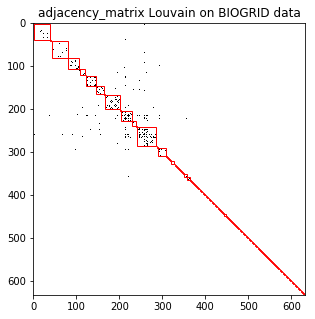

In [21]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on BIOGRID data")
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

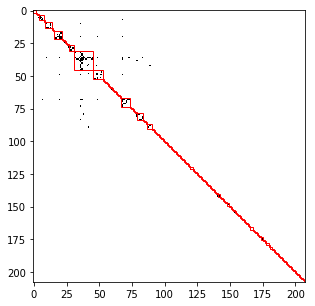

In [22]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

In [23]:
g = nx.Graph()
g.add_nodes_from(list(biogrid_df["Official Symbol Interactor A"])+list(biogrid_df["Official Symbol Interactor B"]))
for indice, x in biogrid_df.iterrows():
    print(indice,end="\r")
    g.add_edge(x["Official Symbol Interactor A"],x["Official Symbol Interactor B"])

'louvain_comms_biogrid=[]\nfor commun in louvain_comms:\n    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))'

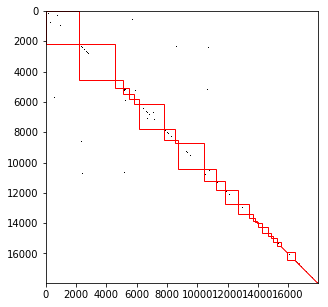

In [24]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values==1)
G=g
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
"""louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))"""

In [25]:
#print(louvain_comms)

In [26]:
for x in range(len(louvain_comms_biogrid)): 
    if len(louvain_comms_biogrid[x])>1:
        print(x)
        print (louvain_comms_biogrid[x])
        print("")

0
['EBF1', 'ZNF423']

3
['BACH2', 'MAFF', 'NFE2L1', 'MAFG']

5
['MYF6', 'BHLHE41', 'BHLHE40', 'TCF12', 'TCF3']

8
['ELF4', 'RAX', 'FOXG1', 'ELF3', 'AR', 'PAX6']

14
['PITX2', 'HOXA1', 'NFATC1', 'IKZF2']

15
['ESR2', 'POU2F1', 'SOX4', 'ETS2', 'NR5A1', 'SP1', 'TP53', 'NFYA', 'GATA6', 'WT1', 'KLF4', 'PPARG', 'GABPA', 'ZBTB49', 'TFAP2A']

16
['ATF3', 'HIC2', 'STAT1', 'STAT3', 'ATF4', 'NFKB2', 'HIC1']

31
['FOXC1', 'HIF1A', 'ESRRB', 'TFCP2', 'TFCP2L1', 'CREB3L1', 'GATA3']

37
['SRF', 'FOXK1', 'TEAD1', 'SOX18', 'MEF2C']

41
['PAX3', 'LEF1', 'STAT5A', 'MEOX1']

71
['FOXJ1', 'RFX3']

91
['IRF7', 'IRF7']

97
['MEF2B', 'MEF2A']

114
['HSF4', 'HSF2']

121
['POU4F1', 'EWSR1']

124
['NR2F6', 'NR2F2']

126
['FOXA2', 'HOXA5']



In [27]:
from collections import Counter

for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    print(i,end= " ")
            print(y,end= " ")
        print("\n")
        
for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        group=[]
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    group.append(i)
        c = Counter( group )
        print(c)
        #print( c.items() )
        #group.sort()
        #print(group)
        print("")

0 EBF1 12 PRRX1 26 ISX 15 SOX4 31 ESRRB 45 LHX2 46 PROX1 51 149 HBP1 54 OTP 8 FOXG1 71 FOXJ1 77 DMRT1 112 ONECUT2 114 HSF4 134 HES7 124 NR2F2 51 149 HBP1 151 BIN1 

1 TBX19 8 ELF4 3 MAFF 13 HNF1A 22 ETV3 48 MIXL1 31 TFCP2 68 RREB1 90 HEY2 95 CLOCK 96 SPIC 101 148 FOXO6 102 TEF 104 OLIG1 3 MAFG 16 STAT3 15 WT1 15 KLF4 143 ETV7 101 148 FOXO6 

3 BACH2 35 ZNF384 0 ZNF423 43 140 GLIS2 44 NKX2-5 49 POU4F3 53 HLX 31 CREB3L1 89 PAX8 92 123 CPEB1 111 ZNF143 114 HSF2 92 123 CPEB1 132 MNT 16 HIC1 43 140 GLIS2 

4 NR5A2 7 HLF 14 PITX2 20 NFIB 27 MESP1 28 TLX2 40 MYEF2 41 PAX3 56 GFI1B 59 RARB 69 FOXO4 80 RARG 109 IRX6 117 HOXB6 120 MYBL2 122 HMX2 144 IRF5 

5 MYF6 29 ATF7 30 NFIL3 32 POU3F1 33 ZSCAN4 57 PAX9 58 ZKSCAN3 79 EMX1 115 ZEB1 118 HOXA3 126 HOXA5 128 HOXA10 130 HOXA4 31 GATA3 15 ZBTB49 8 PAX6 

6 POU2F3 15 ETS2 60 HOXB9 31 TFCP2L1 62 ARX 65 ISL2 67 IKZF3 16 STAT1 81 ZNF740 83 ARHGEF12 100 SIX1 110 BPTF 116 NR3C2 5 BHLHE40 37 TEAD1 127 GSX2 16 ATF4 129 OTX1 15 PPARG 138 DLX4 

10 PRDM4 24

## Show network

In [28]:
print(nbr_signif_corr.columns)

Index(['EBF1', 'TBX19', 'ZBTB7B', 'BACH2', 'NR5A2', 'MYF6', 'POU2F3', 'HLF',
       'ELF4', 'NR4A2',
       ...
       'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18', 'FOXO6', 'HBP1', 'SOX7',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=208)


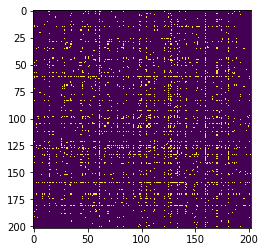

Index(['EBF1', 'TBX19', 'ZBTB7B', 'BACH2', 'NR5A2', 'MYF6', 'POU2F3', 'HLF',
       'ELF4', 'NR4A2',
       ...
       'IRF5', 'ZNF232', 'MEF2A', 'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=202)
[2, 9, 12, 17, 19, 36, 49, 59, 65, 75, 81, 84, 91, 92, 95, 109, 110, 113, 157, 158, 169, 173, 177, 180, 183, 193, 194]


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


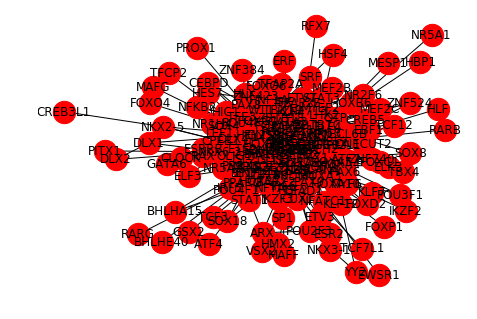

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
nbr_signif_corr=(nbr_signif_corr.loc[~nbr_signif_corr.duplicated(),~nbr_signif_corr.duplicated()])

adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
#genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
print(genes_to_drop)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

## Determine cut_off (where modularity is biggest)

## Test consistency of graph

In [30]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)

In [31]:
"""X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]
Y1 = [ [6,7,8,9,10], [2,3,4,5] ]
print(variation_of_information(X1, Y1))
# VI = 0"""

'X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]\nY1 = [ [6,7,8,9,10], [2,3,4,5] ]\nprint(variation_of_information(X1, Y1))\n# VI = 0'

In [32]:
X4 = [ [1,3],[2,4] ]
Y4 = [ [1,2], [3,4]]
print(variation_of_information(X4, Y4))
# VI = 3.322 (maximum VI is log(N) = log(4) = 1.3862943611198906)

2.0


In [33]:
log(4)

1.3862943611198906

2.7470118497843035


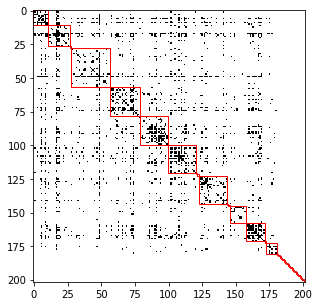

In [34]:
import random
cutoff=11000

G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

#draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small_old=louvain_comms_small
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))

In [35]:
log(135)

4.90527477843843

In [36]:
print(louvain_comms_big)
print(louvain_comms_small)

[['HDX', 'PTEN', 'BACH1', 'MYBL1', 'NKX2-5', 'TFAP4', 'LHX4', 'FOXO4', 'HOXB2', 'HINFP', 'CREB3L1', 'FOXD2', 'HOXB3', 'DLX1', 'DLX2', 'SHOX2', 'TEF', 'IRF3', 'CEBPG', 'NFE2L2', 'MNX1', 'STAT5A', 'SOX7', 'FOXA2', 'MYB', 'HEY1', 'RFX7', 'TCF3', 'RFX2', 'PKNOX1', 'SOX18', 'PTEN', 'SOX7', 'BIN1'], ['LHX8'], ['EBF1', 'ZBTB7B', 'DBP', 'HMX3', 'HLF', 'MAFF', 'SP100', 'ATF6', 'MEF2D', 'ZNF524', 'MGA', 'YY1', 'FOXC1', 'NEUROD2', 'TFEB', 'NFKB1', 'ELK3', 'SRF', 'TEAD3', 'RXRB', 'KLF16', 'RXRB', 'BHLHE22', 'TGIF2', 'E2F3', 'TFE3', 'ARNT', 'SOX30', 'E2F7', 'ETV5', 'SIX3', 'CUX1', 'BRCA1', 'RARB', 'HES5', 'RXRB', 'GMEB2', 'ZNF281', 'LMO2', 'HOXC4', 'ZNF282', 'ERF', 'ATF1', 'EMX1', 'FOXP3', 'RUNX3', 'RARG', 'ZBED1', 'SPDEF', 'TBX21', 'ZNF691', 'RELA', 'FOXJ3', 'VSX2', 'MEF2B', 'ARNTL', 'ATF2', 'SOX8', 'OLIG1', 'AIRE', 'DDIT3', 'MLX', 'BHLHE40', 'TCF12', 'RXRB', 'ZBTB7C', 'GATA4', 'NEUROG2', 'GZF1', 'HMGA1', 'ATF4', 'FOXP1', 'MNT', 'ZBTB7A', 'NFKB2', 'IRF8', 'CENPB', 'HES1', 'EGR2', 'SP3', 'ARID3A', 

In [37]:
print(variation_of_information(louvain_comms_big, louvain_comms_small))

2.002294070950997


In [38]:
print(variation_of_information(louvain_comms_small,louvain_comms_biogrid))

4.357714054476785


In [39]:
log(19)

2.9444389791664403

In [40]:
louvain_comms_big_filtered=[]
for x in louvain_comms_big:
    for y in x:
        if y not in [item for sublist in louvain_comms_small for item in sublist]:
            x.remove(y)
    if len(x) > 0:
        louvain_comms_big_filtered.append(x)
print(louvain_comms_big_filtered)
print(louvain_comms_small)

[['MYBL1', 'NKX2-5', 'LHX4', 'FOXO4', 'HINFP', 'CREB3L1', 'FOXD2', 'DLX1', 'DLX2', 'TEF', 'CEBPG', 'MNX1', 'STAT5A', 'SOX7', 'FOXA2', 'HEY1', 'RFX7', 'TCF3', 'PKNOX1', 'SOX18', 'PTEN', 'SOX7', 'BIN1'], ['EBF1', 'ZBTB7B', 'HMX3', 'HLF', 'MAFF', 'SP100', 'MEF2D', 'ZNF524', 'YY1', 'FOXC1', 'TFEB', 'ELK3', 'SRF', 'TGIF2', 'TFE3', 'SOX30', 'ETV5', 'CUX1', 'RARB', 'ZNF281', 'HOXC4', 'ERF', 'EMX1', 'RUNX3', 'RARG', 'SPDEF', 'TBX21', 'ZNF691', 'FOXJ3', 'VSX2', 'MEF2B', 'ATF2', 'SOX8', 'OLIG1', 'AIRE', 'MLX', 'BHLHE40', 'TCF12', 'RXRB', 'ZBTB7C', 'NEUROG2', 'HMGA1', 'ATF4', 'FOXP1', 'MNT', 'NFKB2', 'CENPB', 'EGR2', 'ARID3A', 'HES5', 'RXRB', 'IRF5', 'ZNF232', 'RXRB', 'XBP1', 'CEBPD'], ['TBX19', 'MYF6', 'ELF4', 'NR4A2', 'ATF3', 'MESP1', 'ATF7', 'NFIL3', 'POU3F1', 'SP4', 'EP300', 'BHLHE41', 'IRF1', 'HBP1', 'PAX9', 'ZKSCAN3', 'HOXB9', 'SP1', 'GLIS3', 'HOXC5', 'ELF3', 'HOXA1', 'TFAP2E', 'HOXB7', 'EOMES', 'POU2F2', 'SOX5', 'BARX2', 'ITGB2', 'IRF7', 'CLOCK', 'IRX6', 'NR3C2', 'HOXB6', 'HOXA3', 'MYBL2',

In [41]:
print(variation_of_information(louvain_comms_big_filtered, louvain_comms_small))

4.122170214314717


In [42]:
log(19)

2.9444389791664403

In [43]:
sum(sum(nbr_signif_corr.values>3000))/(19*19)

17.357340720221607

[0, 53, 60, 63, 64, 88, 105, 114, 138, 181, 200, 1, 14, 20, 24, 32, 47, 61, 83, 121, 122, 150, 155, 172, 179, 190, 191, 2, 3, 4, 22, 40, 46, 56, 72, 73, 74, 80, 89, 101, 117, 118, 129, 132, 136, 137, 139, 151, 156, 159, 165, 168, 184, 187, 192, 198, 201, 5, 10, 13, 25, 31, 34, 35, 37, 41, 45, 50, 67, 69, 77, 94, 98, 131, 133, 134, 153, 162, 176, 6, 7, 30, 33, 71, 76, 82, 93, 96, 100, 102, 108, 125, 143, 149, 152, 161, 163, 167, 178, 196, 8, 11, 15, 21, 23, 57, 66, 68, 112, 120, 128, 130, 141, 142, 146, 148, 154, 160, 164, 166, 186, 9, 12, 16, 18, 29, 43, 44, 48, 51, 52, 58, 62, 85, 87, 103, 115, 116, 144, 145, 147, 170, 185, 188, 17, 19, 26, 27, 54, 70, 79, 90, 119, 123, 124, 140, 175, 195, 28, 38, 78, 86, 97, 99, 106, 107, 126, 127, 135, 174, 189, 199, 36, 39, 42, 55, 104, 111, 171, 182, 197, 49, 59, 65, 75, 81, 84, 91, 92, 95, 109, 110, 113, 157, 158, 169, 173, 177, 180, 183, 193, 194]


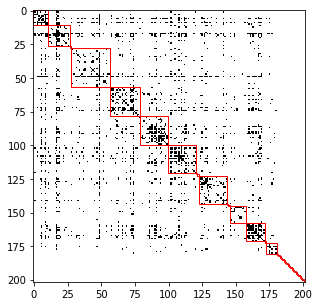

In [44]:
nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
print((nodes_louvain_ordered))

# Test for patient community detection based on expression

In [45]:
import pandas as pd
import numpy as np
#gene_expr = pd.read_csv("expression_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.tsv", sep='\t',header=0,index_col=0)
gene_expr = pd.read_csv("../data/geuvadis_expression/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz", sep='\t',header=0,index_col=0)
gene_expr=gene_expr.drop(['Gene_Symbol', 'Chr', 'Coord'],axis=1)
nbr_cluster=7
cluster_mean=np.zeros([nbr_cluster,gene_expr.shape[0]])
nbr_individuals=gene_expr.shape[1]
#individual_clusters=np.arange(nbr_individuals)%7
individual_clusters=np.round((np.arange(462)+1)/66-0.5).astype(int)
individual_clusters_old=np.zeros(nbr_individuals)
#print(nbr_cluster, nbr_individuals,individual_clusters)

In [46]:
nbr_boucle=0
while not (individual_clusters==individual_clusters_old).all() :
    nbr_boucle+=1
    individual_clusters_old=np.copy(individual_clusters)
    for x, y in enumerate(cluster_mean):
        cluster_mean[x]=np.mean(gene_expr.values[:,individual_clusters==x],axis=1)
        #print((cluster_mean[x]))
    for x, y in enumerate(individual_clusters):
        individual_clusters[x]=np.argmin([np.linalg.norm(gene_expr.values[:,x]-cluster_mean[cluster]) for cluster in range(nbr_cluster)])
        #individual_clusters[x]=
    print((individual_clusters==individual_clusters_old).all())

print(nbr_boucle)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
16


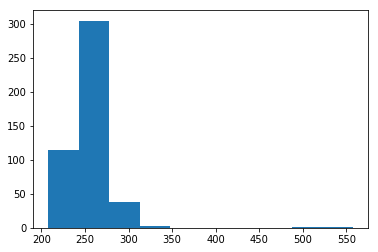

In [47]:
import matplotlib.pyplot as plt
plt.hist(np.std(gene_expr.values,axis=0))
plt.show()

In [48]:
#individual_clusters1=(individual_clusters)

In [49]:
for x in range(len(gene_expr.index)):
    gene_expr.rename(index={gene_expr.index[x]:gene_expr.index[x].split('.')[0]}, inplace=True)
    line=np.where(gene_info.values[:,0]==gene_expr.index[x])
    if(len((line)[0])>0):
        gene_expr.rename(index={gene_expr.index[x]:gene_info.values[line[0][0],5]}, inplace=True)
        #gene_expr.index[x]=gene_info.values[,5]

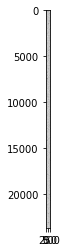

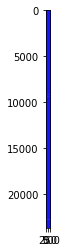

In [50]:
x=gene_expr.values
x=np.transpose(np.transpose(x)-x.mean(axis=1))
x=np.transpose(np.transpose(x)/x.std(axis=1))
pyplot.imshow(x,
              cmap="Greys",
              interpolation="none")
plt.show()
pyplot.imshow(gene_expr.values,
              cmap="bwr",
              interpolation="none")
plt.show()
gene_expr=pd.DataFrame(x,columns=gene_expr.columns,index=gene_expr.index)

In [51]:
def mean_distance(kmeans, values):
    kmeans.labels_, kmeans.cluster_centers_
    distance=0
    for x in range(len(kmeans.labels_)):
        distance+=np.linalg.norm(values[x]-kmeans.cluster_centers_[kmeans.labels_[x]])
    return distance

In [52]:
nbr_cluster=100
from sklearn.cluster import KMeans, AgglomerativeClustering
nbr_tries=3
kmeans = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
distance = mean_distance(kmeans, gene_expr.T.values)
for x in range(nbr_tries):
    kmeans_temp = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
    distance_temp = mean_distance(kmeans_temp, gene_expr.T.values)
    if distance_temp<distance:
        distance=distance_temp
        kmeans=kmeans_temp
ward = AgglomerativeClustering(n_clusters=nbr_cluster, linkage='ward').fit(gene_expr.T)
individuals_sorted_ward=sorted(range(len(ward.labels_)), key=lambda k: ward.labels_[k])
individuals_sorted_kmeans=sorted(range(len(kmeans.labels_)), key=lambda k: kmeans.labels_[k])

In [53]:
((nbr_signif_corr.values>11000) | np.transpose(nbr_signif_corr.values>11000))[:,nodes_louvain_ordered][nodes_louvain_ordered,:]

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [54]:
nodes_louvain_ordered

[0,
 53,
 60,
 63,
 64,
 88,
 105,
 114,
 138,
 181,
 200,
 1,
 14,
 20,
 24,
 32,
 47,
 61,
 83,
 121,
 122,
 150,
 155,
 172,
 179,
 190,
 191,
 2,
 3,
 4,
 22,
 40,
 46,
 56,
 72,
 73,
 74,
 80,
 89,
 101,
 117,
 118,
 129,
 132,
 136,
 137,
 139,
 151,
 156,
 159,
 165,
 168,
 184,
 187,
 192,
 198,
 201,
 5,
 10,
 13,
 25,
 31,
 34,
 35,
 37,
 41,
 45,
 50,
 67,
 69,
 77,
 94,
 98,
 131,
 133,
 134,
 153,
 162,
 176,
 6,
 7,
 30,
 33,
 71,
 76,
 82,
 93,
 96,
 100,
 102,
 108,
 125,
 143,
 149,
 152,
 161,
 163,
 167,
 178,
 196,
 8,
 11,
 15,
 21,
 23,
 57,
 66,
 68,
 112,
 120,
 128,
 130,
 141,
 142,
 146,
 148,
 154,
 160,
 164,
 166,
 186,
 9,
 12,
 16,
 18,
 29,
 43,
 44,
 48,
 51,
 52,
 58,
 62,
 85,
 87,
 103,
 115,
 116,
 144,
 145,
 147,
 170,
 185,
 188,
 17,
 19,
 26,
 27,
 54,
 70,
 79,
 90,
 119,
 123,
 124,
 140,
 175,
 195,
 28,
 38,
 78,
 86,
 97,
 99,
 106,
 107,
 126,
 127,
 135,
 174,
 189,
 199,
 36,
 39,
 42,
 55,
 104,
 111,
 171,
 182,
 197,
 49,
 59,
 65,


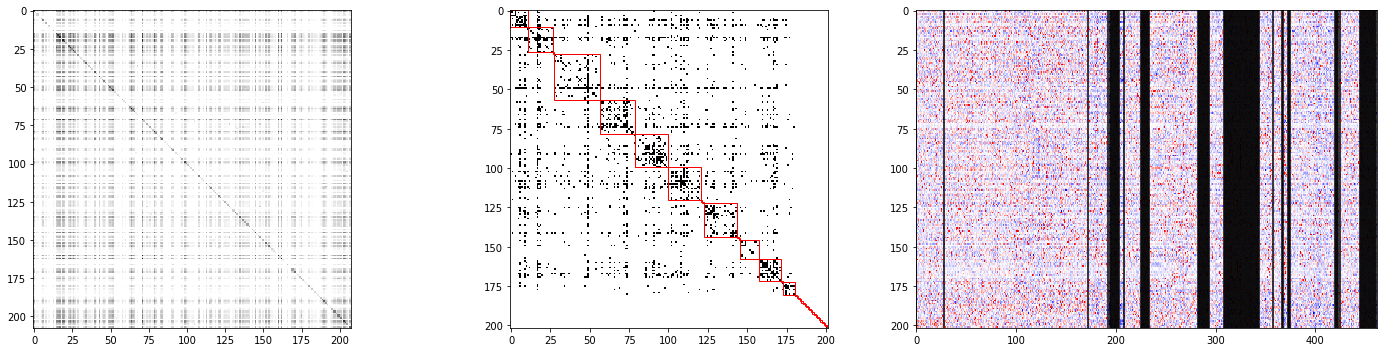

In [72]:
(G, node_order, partitions, colors)=(G, nodes_louvain_ordered, [louvain_comms], ["red"])
from matplotlib.gridspec import GridSpec
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

#Plot adjacency matrix in toned-down black and white
fig = pyplot.figure(figsize=(20, 5)) # in inches
gs = GridSpec(3, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plt.subplot(131)
adjacency_matrix2 = connections_between_genes.loc[nbr_signif_corr.index[nodes_louvain_ordered],nbr_signif_corr.index[nodes_louvain_ordered]].values
pyplot.imshow(np.clip((adjacency_matrix2),1000,10000),
              interpolation="none",
              cmap="binary")


ax1 = fig.add_subplot(gs[1, 0])
plt.subplot(132)
pyplot.imshow(((nbr_signif_corr.values>11000) | np.transpose(nbr_signif_corr.values>11000))[:,nodes_louvain_ordered][nodes_louvain_ordered,:],
                  cmap="Greys",
                  interpolation="none")

"""ax1 = fig.add_subplot(gs[1, 0])
plt.subplot(132)
pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
"""

# The rest is just if you have sorted nodes by a partition and want to
# highlight the module boundaries
assert len(partitions) == len(colors)
ax = pyplot.gca()
for partition, color in zip(partitions, colors):
    current_idx = 0
    for module in partition:
        ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
        current_idx += len(module)

ax1 = fig.add_subplot(gs[2:, 0])
plt.subplot(133)
adjacency_matrix = gene_expr.loc[nbr_signif_corr.index[nodes_louvain_ordered]].iloc[:,individuals_sorted_kmeans].values
pyplot.imshow(np.clip((adjacency_matrix),-3,3),
              interpolation="none",
              cmap="bwr",
             aspect='auto')

"""pyplot.imshow(abs(np.clip((adjacency_matrix),-3,3)),
              interpolation="none",
              cmap="inferno",
             aspect='auto')"""


xline=0
for x in np.unique(kmeans.labels_, return_counts=True)[1]:
    xline+=x
    plt.axvline(x=xline-1, color='k')

fig.tight_layout()
fig.show()
#plt.show()

In [ ]:
gene_expr.shape

In [ ]:
nbr_signif_corr.index[nodes_louvain_ordered]

normalized mutual information

deribayesian
kmeans for all genes (not only interesting ones)
factorisation 

In [56]:
network_compendium = pd.read_csv("../data/Network_compendium/Tissue-specific_regulatory_networks_FANTOM5-v1/\
32_high-level_networks/10_lymphocytes.txt.gz", sep='\t', header=None).values
#10_lymphocytes.txt.gz
#11_myeloid_leukocytes.txt.gz

In [57]:
tf_connected_to_genes=pd.DataFrame(data=np.zeros([len(gene_info["Gene name"]), len(set(network_compendium[:,1]))]),
                                   index=gene_info["Gene name"],columns=set(network_compendium[:,1]))

In [58]:
for i, TF in enumerate(gene_info["Gene name"]):
    print(i, TF, end = "\r")
    for x in network_compendium:
        if x[0] == TF:
            tf_connected_to_genes[x[1]][TF] = 1
print("Finished     ")

Finished     


In [59]:
nbr_signif_corr.index[nodes_louvain_ordered]

Index(['EBF1', 'LHX2', 'HBP1', 'OTP', 'CUX1', 'FOXJ1', 'ARHGEF12', 'NFYA',
       'ONECUT2', 'NR2F2',
       ...
       'IRF7', 'STAT5A', 'SOX7', 'RFX3', 'ZNF652', 'ELF1', 'PPARA', 'GABPA',
       'ZNF232', 'MEF2A'],
      dtype='object', name='Gene name', length=202)

In [60]:
connections_between_genes = tf_connected_to_genes.dot(tf_connected_to_genes.transpose())

In [61]:
np.max(connections_between_genes.values)

12003.0

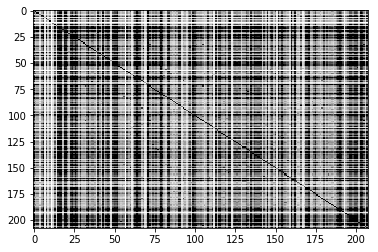

In [62]:
adjacency_matrix2 = connections_between_genes.loc[nbr_signif_corr.index[nodes_louvain_ordered],nbr_signif_corr.index[nodes_louvain_ordered]].values
pyplot.imshow(np.clip((adjacency_matrix2),0,2000),
              interpolation="none",
              cmap="binary",
             aspect='auto')

In [63]:
connections_between_genes

Gene name,HDX,LHX8,EBF1,TBX19,DUXA,KLF14,ZBTB7B,BACH2,MAFK,TBX15,...,GATA4,SOX7,HSF1,SCRT1,NRL,IRF9,E2F2,NOBOX,BIN1,MEF2C
Gene name,,,,,,,,,,,,,,,,,,,,,
HDX,2091.0,457.0,1269.0,232.0,331.0,928.0,438.0,992.0,1105.0,695.0,...,962.0,1199.0,1147.0,463.0,463.0,1457.0,385.0,383.0,0.0,0.0
LHX8,457.0,2245.0,1181.0,251.0,396.0,929.0,407.0,1018.0,1120.0,672.0,...,1084.0,1325.0,1096.0,339.0,524.0,1410.0,373.0,604.0,0.0,0.0
EBF1,1269.0,1181.0,6391.0,558.0,831.0,3168.0,1317.0,2959.0,3259.0,1907.0,...,2723.0,3049.0,3398.0,1133.0,1504.0,3930.0,1003.0,919.0,0.0,0.0
TBX19,232.0,251.0,558.0,974.0,205.0,349.0,130.0,497.0,522.0,305.0,...,472.0,560.0,600.0,237.0,276.0,679.0,210.0,117.0,0.0,0.0
DUXA,331.0,396.0,831.0,205.0,1503.0,545.0,197.0,693.0,864.0,457.0,...,650.0,884.0,772.0,242.0,413.0,958.0,205.0,272.0,0.0,0.0
KLF14,928.0,929.0,3168.0,349.0,545.0,5225.0,1145.0,2309.0,2388.0,1488.0,...,1991.0,2172.0,2514.0,784.0,1053.0,2903.0,740.0,674.0,0.0,0.0
ZBTB7B,438.0,407.0,1317.0,130.0,197.0,1145.0,2013.0,1041.0,1072.0,695.0,...,859.0,985.0,1136.0,406.0,411.0,1276.0,380.0,351.0,0.0,0.0
BACH2,992.0,1018.0,2959.0,497.0,693.0,2309.0,1041.0,4825.0,2647.0,1415.0,...,2177.0,2402.0,2641.0,848.0,1243.0,3054.0,757.0,774.0,0.0,0.0
MAFK,1105.0,1120.0,3259.0,522.0,864.0,2388.0,1072.0,2647.0,5705.0,1611.0,...,2594.0,3075.0,2885.0,950.0,2118.0,3690.0,900.0,879.0,0.0,0.0


In [64]:
np.unique(tf_connected_to_genes, return_counts=True)

(array([0., 1.]), array([6520382, 2232818]))

In [65]:
sum(np.sum(tf_connected_to_genes.values,axis=1))

2232818.0

In [66]:
len(set(network_compendium[:,1]))

13850

In [67]:
gene_info["Gene name"][0]

'HDX'

In [68]:
(network_compendium[:,2]<0.05)

array([ True,  True,  True, ...,  True,  True,  True])